# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [29]:
# Your code here
import pandas as pd
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df = df.sample(n=100000, random_state = 0)

### What is the distribution of the outcome? 

In [30]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4644207,330,CASH_IN,607193.64,C104196924,15458649.28,16065842.92,C2020875465,3394537.70,2787344.06,0,0
3800666,281,PAYMENT,3473.75,C1283140808,0.00,0.00,M2044695613,0.00,0.00,0,0
4426240,322,CASH_OUT,66170.69,C1376666142,32803.00,0.00,C52514926,0.00,66170.69,0,0
5788765,401,TRANSFER,335384.26,C2136161445,197.00,0.00,C2094766437,5311958.61,5647342.87,0,0
2010701,180,CASH_IN,234392.25,C801137003,20882.00,255274.25,C1255594470,0.00,0.00,0,0
3674513,276,TRANSFER,648080.29,C1798990591,36066.00,0.00,C1615159603,3101424.27,3749504.56,0,0
3500205,259,PAYMENT,12401.59,C1932491210,115022.00,102620.41,M1912182734,0.00,0.00,0,0
165676,12,CASH_OUT,161406.28,C413245570,0.00,0.00,C1147977782,1458156.22,633407.30,0,0
4546763,326,PAYMENT,0.24,C1560061062,2860.00,2859.76,M80636379,0.00,0.00,0,0
5496085,380,PAYMENT,61681.67,C373132241,231357.94,169676.27,M638432919,0.00,0.00,0,0


In [31]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [32]:
df['isFraud'].value_counts() 

0    99876
1      124
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [33]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [34]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,243.275490,1.803276e+05,8.190467e+05,8.397849e+05,1.099411e+06,1.225219e+06,0.001240,0.0
std,142.612187,6.727792e+05,2.865331e+06,2.900862e+06,3.287719e+06,3.605433e+06,0.035192,0.0
min,1.000000,1.700000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.326999e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,239.000000,7.378915e+04,1.382350e+04,0.000000e+00,1.248797e+05,2.101330e+05,0.000000,0.0
75%,334.000000,2.081081e+05,1.058275e+05,1.413050e+05,9.313472e+05,1.102560e+06,0.000000,0.0
max,724.000000,9.244552e+07,3.427425e+07,3.439305e+07,1.765596e+08,1.922789e+08,1.000000,0.0


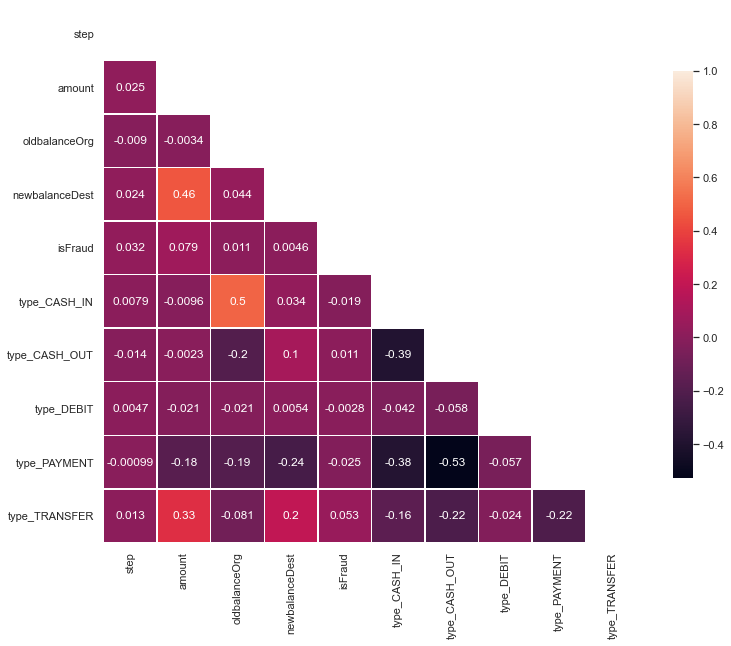

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [36]:
df['nameOrig'].unique().sum()

'C104196924C1283140808C1376666142C2136161445C801137003C1798990591C1932491210C413245570C1560061062C373132241C180831499C1314060756C1669763682C671950740C288330085C1718049873C1090245845C359334858C1163468548C1467090697C1558242651C1901976030C1694131084C1287060210C2093049786C1514641889C426113993C2127745790C1026594088C1481305123C1510771712C524255264C1386822253C893116820C261729352C802153480C209591143C221191581C929111924C327930769C271601279C1564276282C1829548251C530509841C356417561C616095322C434627872C26903110C1862455679C1479581385C1551764535C1841361819C1776369276C1842453967C624356638C2116850481C315652716C1774906105C311811779C1669415647C1490198302C407576670C1934535944C1105463041C11598977C121691367C1703790913C1648246907C113129203C652220971C654539000C1846395539C1119334840C510803138C432015127C11726292C1392189260C413509104C1581937563C2067286265C480872169C145163577C1067785795C551293300C617436954C1831763228C839996706C1364639588C666731805C1440061828C1222196884C180928733C1756506553C1027330083C915821948C

In [37]:
df['nameDest'].unique().sum()

'C2020875465M2044695613C52514926C2094766437C1255594470C1615159603M1912182734C1147977782M80636379M638432919C189164891C1624477723M1512738381C1451982273M1930079269M1358892444M1568314566M15066064C977340260C767902609C1050500967M1961479214C333456498C1422643114C1616753424M1554998678M567588141M824359233C296412386C1419353200C2088075172C509158768C2084687200M1432071138M241960178C731483963M899725355C1198230991M1958036613C1246268996C1363504147C1241378082C597198429M1042311971M1352103275C1609986044M1045143801C718073937C1315688903C1703771898C1492613503M1066741376C406318659C129244949C1684215355M918462139M726073360M1711034357C1356875451C1891017857C1486220040M1540311763M1309343783C1974034529C2084336340M247378080M23679419M2117505671M997050824C1826147967M737039477C1725614025C1375476502C1711790560C4067211C2066938021M733736720M2027173751C454220730C641404448C1077763653M314995846M955143545M1686843994C359036833C1160445855C876638668M1371541706C1323821906C1662875350M514184305M697422263M105091804M1103942359M124823

In [38]:
df['isFlaggedFraud'].unique()

array([0], dtype=int64)

In [39]:
df['isFraud'].unique()

array([0, 1], dtype=int64)

In [40]:
df['type'].unique()

array(['CASH_IN', 'PAYMENT', 'CASH_OUT', 'TRANSFER', 'DEBIT'],
      dtype=object)

In [41]:
df['step'] = (df['step']/24).astype(int)

In [42]:
df.drop([ 'nameOrig','nameDest','oldbalanceDest', 'isFlaggedFraud','newbalanceOrig'], axis=1, inplace=True)

In [43]:
df = pd.get_dummies(df)
df.head()

,step,amount,oldbalanceOrg,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
4644207,13,607193.64,15458649.28,2787344.06,0,1,0,0,0,0
3800666,11,3473.75,0.00,0.00,0,0,0,0,1,0
4426240,13,66170.69,32803.00,66170.69,0,0,1,0,0,0
5788765,16,335384.26,197.00,5647342.87,0,0,0,0,0,1
2010701,7,234392.25,20882.00,0.00,0,1,0,0,0,0


In [44]:
df.isna().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceDest    0
isFraud           0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

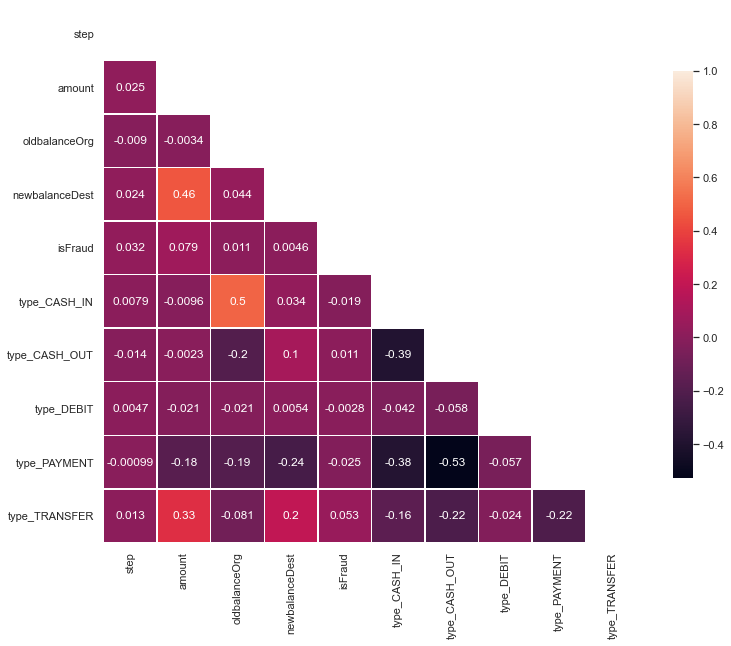

In [59]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

### Run a logisitc regression classifier and evaluate its accuracy.

In [47]:
# Your code here
X = df.drop(['isFraud'], axis =1) # features
y = df['isFraud'] # target

# splitting the data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)


model.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


y_pred = model.predict(X_test)

s
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')


print('Accuracy score')
print(accuracy_score(y_pred,y_test))

print('-------------------------------------------------------')

print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[19933    30]
 [   37     0]]
-------------------------------------------------------
Accuracy score
0.99665
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19963
           1       0.00      0.00      0.00        37

    accuracy                           1.00     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       1.00      1.00      1.00     20000



### Now pick a model of your choice and evaluate its accuracy.

In [52]:
# Your code here
# import model
from sklearn.tree import DecisionTreeClassifier

# create instance of the model
dtc = DecisionTreeClassifier()

# train the model
dtc.fit(X_train, y_train)

#predictions: test data
y_pred = dtc.predict(X_test)

# compare predictions to actual answers
print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')

# accuracy_score
# fitted X_test data vs. y_test data (actual answer)
print('Accuracy score')
print(accuracy_score(y_pred,y_test))

print('-------------------------------------------------------')
# classification report
print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[19959    11]
 [   11    19]]
-------------------------------------------------------
Accuracy score
0.9989
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19970
           1       0.63      0.63      0.63        30

    accuracy                           1.00     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       1.00      1.00      1.00     20000



### Which model worked better and how do you know?

In [53]:
#Your response here


from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier()


forest.fit(X_train, y_train)


y_pred = forest.predict(X_test)


print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')


print('Accuracy score')
print(forest.score(X_test,y_test))
print('-------------------------------------------------------')

# classification report
print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[19969    10]
 [    1    20]]
-------------------------------------------------------
Accuracy score
0.99945
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19979
           1       0.67      0.95      0.78        21

    accuracy                           1.00     20000
   macro avg       0.83      0.98      0.89     20000
weighted avg       1.00      1.00      1.00     20000



In [55]:
#Testing resample
from sklearn.utils import resample


X = df.drop(['isFraud'], axis =1) 
y = df['isFraud'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


X = pd.concat([X_train, y_train], axis=1)


not_fraud = X[X.isFraud == 0]
fraud = X[X.isFraud == 1]


not_fraud_downsampled = resample(not_fraud,
                                replace=False, 
                                n_samples=len(fraud), 
                                random_state=0) 


downsampled = pd.concat([not_fraud_downsampled, fraud])


downsampled['isFraud'].value_counts()

1    96
0    96
Name: isFraud, dtype: int64

In [56]:
X = downsampled.drop(['isFraud'], axis=1) 
y = downsampled['isFraud'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


forest = RandomForestClassifier()


forest.fit(X_train, y_train)


y_pred = forest.predict(X_test)


print('Confusion matrix')
print(confusion_matrix(y_pred,y_test))
print('-------------------------------------------------------')

print('Accuracy score')
print(forest.score(X_test,y_test))

print('-------------------------------------------------------')


print('Classification report')
print(classification_report(y_pred,y_test))

Confusion matrix
[[15  0]
 [ 1 23]]
-------------------------------------------------------
Accuracy score
0.9743589743589743
-------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.96      0.98        24

    accuracy                           0.97        39
   macro avg       0.97      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39



In [ ]:

# Your response here

# the Random Forest had the best result compared to the other models.

#After using downsampled the result improved even more.



### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.